## 解题

![](https://github.com/ChenDuBUAA/test/blob/master/part1.jpg)
![](https://github.com/ChenDuBUAA/test/blob/master/part2.jpg)

设随机变量$\Theta、\Phi$分别表示针与水平方向和竖直方向的夹角,向右、向上为正方向，则

$$\theta \in[0, \pi),\phi=\begin{cases}{\theta+\frac{\pi}{2},0\leq\theta<\frac{\pi}{2}} \\ {\theta-\frac{\pi}{2},\frac{\pi}{2}\leq\theta<\pi} \end{cases}$$

$\Theta$服从均匀分布，其概率密度函数为

$$f(\theta)=\begin{cases} 1/\pi,\theta\in[0,\pi) \\ 0,其它\end{cases}$$

设随机变量$X、Y$分别表示针的中点到水平直线和竖直直线的最短距离，独立同分布，其概率密度函数为

$$g(x)=\begin{cases} 2/t,x\in[0,t/2] \\ 0,其它\end{cases}$$

$$g(y)=\begin{cases} 2/t,y\in[0,t/2] \\ 0,其它\end{cases}$$

记事件针与水平方向的直线相交为A，事件针与竖直方向的直线相交为B，则需要满足几何约束

$$x\leq\frac{l}{2}sin\theta, y\leq\frac{l}{2}sin\phi$$

则可计算概率

$$P(A) = P(B) = \int_0^\pi \int_0^{\frac{l}{2}sin\theta} \frac{1}{\pi}\frac{2}{t} {\rm d}x{\rm d}\theta = \frac{2l}{\pi t}$$

$$P(A\cap B)=\int_0^\pi \int_0^{\frac{l}{2}sin\theta} \int_0^{\frac{l}{2}sin\phi} \frac{1}{\pi}\frac{2} {t}\frac{2}{t} {\rm d}y{\rm d}x{\rm d}\theta = \frac{l^2}{\pi t^2}$$

$$P(A\cup B)=P(A)+P(B)-P(A\cap B) = \frac{4l}{\pi t}-\frac{l^2}{\pi t^2}$$

$$P(不相交) = 1 - P(A\cup B) = 1 - \frac{4l}{\pi t}-\frac{l^2}{\pi t^2}$$

## 实验代码

prob_mc - prob_cal=
[-0.00231669  0.00265331 -0.00279669 -0.00199669  0.00088331 -0.00140669
 -0.00255669  0.00011331  0.00080331  0.00006331 -0.00173669 -0.00055669
 -0.00037669 -0.00060669  0.00238331 -0.00175669  0.00054331 -0.00222669
  0.00042331  0.00268331  0.00121331 -0.00031669  0.00053331 -0.00232669
  0.00028331  0.00174331  0.00093331  0.00223331  0.00046331 -0.00167669
 -0.00099669 -0.00086669  0.00164331 -0.00303669  0.00115331  0.00115331
  0.00171331 -0.00227669 -0.00013669 -0.00028669  0.00025331 -0.00188669
  0.00121331 -0.00114669 -0.00316669 -0.00145669  0.00068331  0.00090331
  0.00036331  0.00038331 -0.00211669 -0.00182669  0.00059331  0.00132331
  0.00062331  0.00177331 -0.00093669 -0.00093669 -0.00159669 -0.00012669
  0.00041331  0.00134331  0.00110331 -0.00007669 -0.00094669 -0.00189669
 -0.00103669  0.00116331  0.00217331 -0.00152669  0.00021331 -0.00014669
 -0.00025669  0.00105331 -0.00128669  0.00085331  0.00140331 -0.00052669
  0.00164331  0.00165331 -0.002

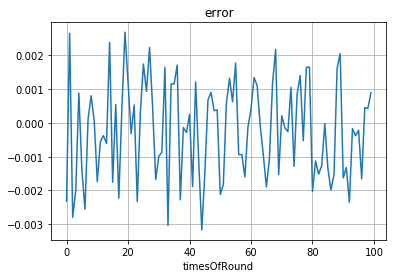

In [6]:
# coding:utf-8


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def exam_du_2015_2_3(t, l):
    # t: distance between lines
    # l: length of needle
    if t <= l or t <= 0 or l <= 0:
        return 0

    k = 0.0
    n = 100000

    x = np.random.uniform(0, t / 2.0, n)
    y = np.random.uniform(0, t / 2.0, n)
    theta = np.random.uniform(0, np.pi, n)

    pos_neg = np.ones(theta.shape)
    pos_neg[theta >= np.pi / 2] = -1
    phi = theta + np.pi / 2 * pos_neg

    for i in range(n):
        if x[i] <= l / 2.0 * np.sin(theta[i]) or y[i] <= l / 2.0 * np.sin(phi[i]):
            k += 1

    return 1.0 - k / n


if __name__ == '__main__':
    t_input = 1
    l_input = 0.8

    timesOfRound = 100
    prob_mc = []
    for i in range(timesOfRound):
        prob_mc.append(exam_du_2015_2_3(t_input, l_input))

    prob_cal = 1.0 - (4.0 * l_input / (np.pi * t_input) - l_input ** 2 / (np.pi * t_input ** 2))

    err = np.array(prob_mc) - prob_cal
    avg = abs(err).mean()
    np.set_printoptions(suppress=True)
    print('prob_mc - prob_cal=\n{}'.format(err))
    print('\nmean absolute error is:{}'.format(avg))

    plt.figure()
    index = np.array(range(timesOfRound))
    plt.plot(index, err)
    plt.title('error')
    plt.xlabel('timesOfRound')
    plt.grid(True)
    plt.show()